In [1]:
# supress the warning message
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

in_file_name = 'SMSSpamCollection.txt'
df = pd.read_csv(in_file_name, delimiter='\t', header=None)

In [3]:
# Check the shape of the data
df.shape

(5572, 2)

In [4]:
# Check the sample 5 samples
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
print df[df[0] == 'ham'][0].count()

4825


In [6]:
# Split into train and test, convert to Tfidf vectors
# Fit the model and run predict to get the result
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])
vec = TfidfVectorizer()
X_train = vec.fit_transform(X_train_raw)
X_test = vec.transform(X_test_raw)
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [7]:
pred.shape

(1393,)

In [12]:
# Validate the perform
# confusion_matrix used to test binary classification problem, input pair like [1,0,1,0] and [1,1,1,1]
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, pred)
print confusion_matrix

[[1199    0]
 [  46  148]]


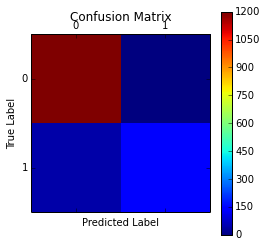

In [13]:
plt.matshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [26]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
precision_score(y_test.values, pred)

ValueError: pos_label=1 is not a valid label: array(['ham', 'spam'], 
      dtype='|S4')

In [28]:
len(y_test.values)

1393

In [ ]:
le